<a href="https://colab.research.google.com/github/Lotfullah21/Algorithms_AI/blob/main/Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Initialization with Same Weights </h1>


<h3>Objective for this Notebook<h3>    
<h5> 1. Learn hw to Define the Neural Network with Same Weights Initialization define  Criterion Function, Optimizer, and Train the Model</h5>
<h5> 2.Define the Neural Network with defult Weights Initialization define  Criterion Function, Optimizer</h5>
<h5> 3. Train the Model </h5>     


<h2>Table of Contents</h2>
<p>In this lab, we will see the problem of initializing the weights with the same value. We will see that even for a simple network, our model will not train properly. .</p>

<ul>
    <li><a href="https://#Model">Neural Network Module and Training Function</a></li>
    <li><a href="https://#Makeup_Data">Make Some Data</a></li>
    <li><a href="https://https://#Train">Define the Neural Network with Same Weights Initialization define  Criterion Function, Optimizer, and Train the Model</a></li>
    <li><a href="#Train">Define the Neural Network with defult Weights Initialization define  Criterion Function, Optimizer, and Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


<h2>Preparation</h2>


We'll need the following libraries


In [2]:
import torch
import torch.nn as nn
from torch import sigmoid 
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)

### 1. Define a plotting funciton

In [57]:
def PlotStuff(x,y,model,epoch, leg = True):


  plt.plot(x.numpy(), model(x).detach().numpy(),label=('epoch'+str(epoch)))
  plt.plot(x.numpy(),y.numpy(),'r')
  plt.xlabel('x')
  if leg == True:
    plt.legend()
  else:
    pass

In [ ]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

### 2. Structure of the model

In [41]:
class Network(nn.Module):
  # constructor
  def __init__(self, in_D, H_D, out_D):
    super(Network,self).__init__()
    # hidden layer
    self.linear1 = nn.Linear(in_D, H_D)
    self.linear2 = nn.Linear(H_D, out_D)
  
  # Forward movement
  
  def forward(self,x):
    self.layer1 = self.linear1(x)
    self.activation = sigmoid(self.layer1)
    self.layer2 = self.linear2(self.activation)
    y_hat = sigmoid(self.layer2)
    return y_hat

### 3. defining training function

In [59]:
# Define the Training function
def train(input,output,model, optimizer, criterion_cross, epochs = 1000):
  cost = []
  total = 0
  for epoch in range(epochs):
    total = 0
    for x,y in zip(input,output):
      y_hat = model(x)
      loss = criterion_cross(y_hat, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      total = total + loss.item()
    cost.append(total)
    if epoch % 300 == 0:
      PlotStuff(input, output, model, epoch, leg = True)
      plt.show()
      model(input)
      plt.scatter(model.activation.detach().numpy()[:,0],model.activation.detach().numpy()[:,1], c = output.numpy().reshape(-1))
      plt.title("activation")
      plt.show()
  return cost    

### 4. Making data

In [60]:
input = torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor)
output = torch.zeros(input.shape[0])
output[(input[:,0]>-4) & (input[:,0]<4)] = 1.0

### 5.Creaing the loss function

In [61]:
def criterion_cross(output, ground_truth):
  out = -1 * torch.mean(ground_truth*torch.log(output) + (1-ground_truth)*torch.log(1-output))
  return out

#### 5.1. Define the model

In [62]:
in_D = 1
H = 2
# self.inear1 = (2,1) weight matrix
out_D = 1
# self.linear2 = (1,2) weight matrix
learning_rate = 0.01
model = Network(in_D, H, out_D)

In [63]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[-0.4741],
                      [ 0.6809]])),
             ('linear1.bias', tensor([-0.0065, -0.4970])),
             ('linear2.weight', tensor([[-0.5419, -0.6617]])),
             ('linear2.bias', tensor([-0.5968]))])

##### 5.1.1. based on the state of the modlel initialize some weights

In [64]:
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

OrderedDict([('linear1.weight', tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

### 5.2 Train the model 


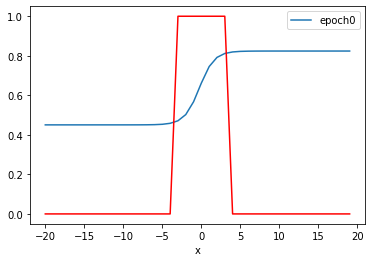

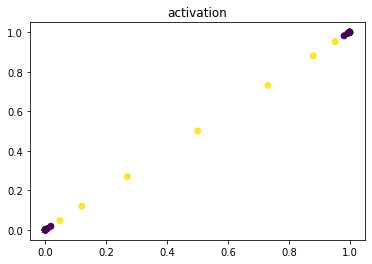

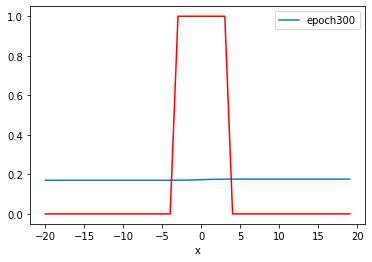

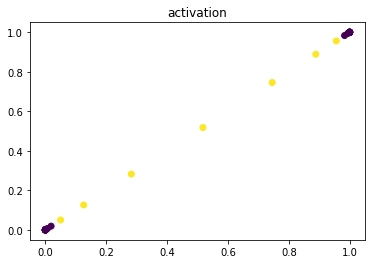

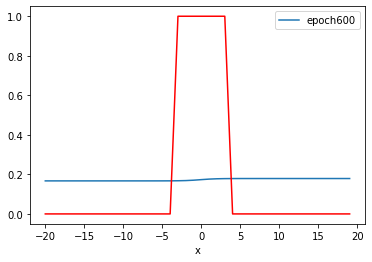

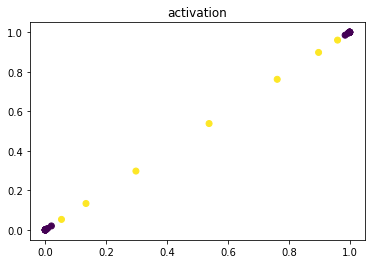

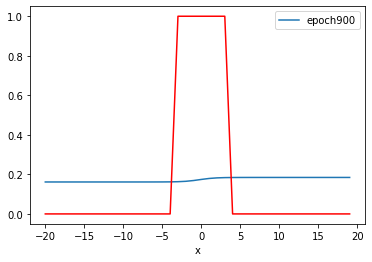

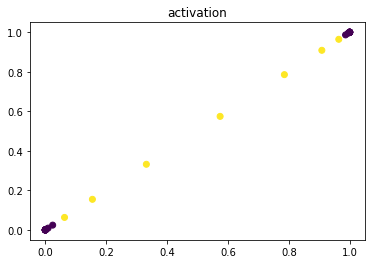

Text(0.5, 1.0, 'cross entropy loss')

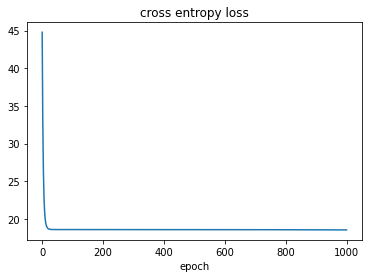

In [65]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
cross_E_cost = train(input,output, model, optimizer, criterion_cross, epochs = 1000)
plt.plot(cross_E_cost)
plt.xlabel('epoch')
plt.title("cross entropy loss")

In [67]:
model.state_dict()


OrderedDict([('linear1.weight', tensor([[0.9841],
                      [0.9841]])),
             ('linear1.bias', tensor([0.3722, 0.3722])),
             ('linear2.weight', tensor([[0.0997, 0.0997]])),
             ('linear2.bias', tensor([-1.6672]))])

In [ ]:
yhat=model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

#### 5.1 Define the model

In [68]:
# Define the Training function
def train(input,output,model, optimizer, criterion_cross, epochs = 1000):
  cost = []
  total = 0
  for epoch in range(epochs):
    total = 0
    for x,y in zip(input,output):
      y_hat = model(x)
      loss = MSE(y_hat, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      total = total + loss.item()
    cost.append(total)
    if epoch % 300 == 0:
      PlotStuff(input, output, model, epoch, leg = True)
      plt.show()
      model(input)
      plt.scatter(model.activation.detach().numpy()[:,0],model.activation.detach().numpy()[:,1], c = output.numpy().reshape(-1))
      plt.title("activation")
      plt.show()
  return cost    

In [69]:
def MSE(output, ground_truth):
  loss = nn.MSELoss()
  output = loss(output,ground_truth)
  return output

In [70]:
in_D = 1
H = 2
# self.inear1 = (2,1) weight matrix
out_D = 1
# self.linear2 = (1,2) weight matrix
learning_rate = 0.01
model = Network(in_D, H, out_D)

In [74]:
# model.state_dict()['linear1.weight'][0]=1.0
# model.state_dict()['linear1.weight'][1]=1.0
# model.state_dict()['linear1.bias'][0]=0.0
# model.state_dict()['linear1.bias'][1]=0.0
# model.state_dict()['linear2.weight'][0]=1.0
# model.state_dict()['linear2.bias'][0]=0.0
# model.state_dict()

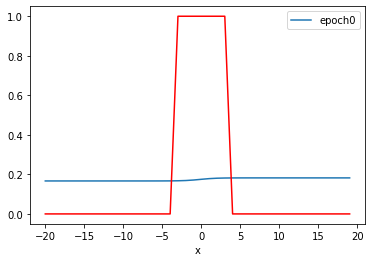

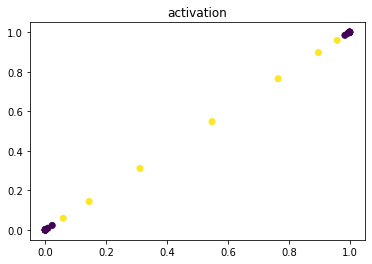

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


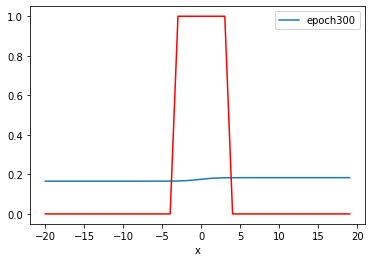

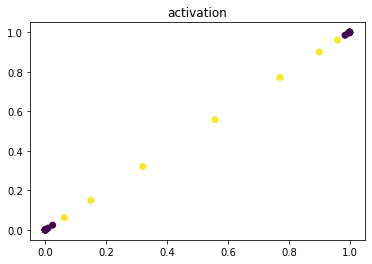

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


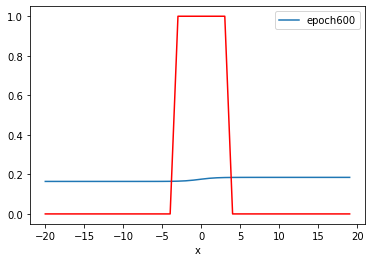

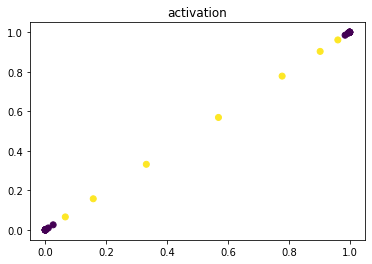

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


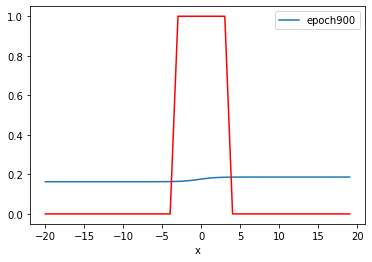

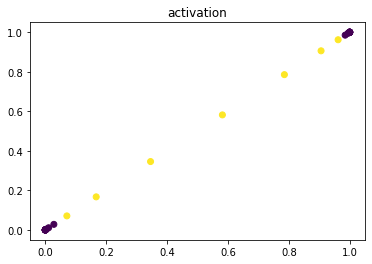

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0.5, 1.0, 'Mean squared loss')

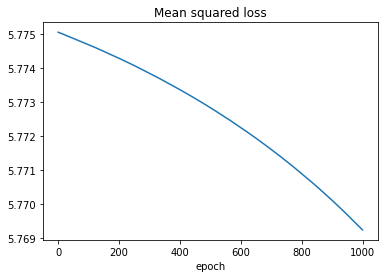

In [75]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
cross_E_cost = train(input,output, model, optimizer, MSE, epochs = 1000)
plt.plot(cross_E_cost)
plt.xlabel('epoch')
plt.title("Mean squared loss")

<!--Empty Space for separating topics-->
